In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import os

/home/el10/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/el10/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/el10/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/el10/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/el10/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/el10/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_l

In [114]:
demand = pd.read_csv('energy_weather_global_data.csv', header=0, index_col=0)
demand.index.name = 'timeStamp'
demand.rename(columns={'energy':'demand', 'temperature':'temp', 'day_of_week':'dayofweek'}, inplace=True)
#demand['energy'].name = 'demand'
demand.reset_index(inplace=True)
demand["timeStamp"]=pd.to_datetime(demand["timeStamp"], format='%Y-%m-%d %H:%M')
demand.head()

timeStamp  windSpeed  humidity   temp      demand  hour  \
0 2012-05-01 00:00:00       5.89      0.89  12.57  651.655001     0   
1 2012-05-01 01:00:00       6.17      0.93  12.54  627.957000     1   
2 2012-05-01 02:00:00       6.27      0.92  12.47  532.349001     2   
3 2012-05-01 03:00:00       5.93      0.90  11.98  497.736000     3   
4 2012-05-01 04:00:00       5.20      0.95  11.57  490.989000     4   

   dayofweek  month  
0          1      5  
1          1      5  
2          1      5  
3          1      5  
4          1      5

In [115]:
min_time = min(demand['timeStamp'])
min_time

Timestamp('2012-01-01 00:00:00')

In [116]:
max_time = max(demand['timeStamp'])
max_time

Timestamp('2014-02-28 00:00:00')

In [117]:
dt_idx = pd.date_range(min_time, max_time, freq='H')
dt_idx

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2014-02-27 15:00:00', '2014-02-27 16:00:00',
               '2014-02-27 17:00:00', '2014-02-27 18:00:00',
               '2014-02-27 19:00:00', '2014-02-27 20:00:00',
               '2014-02-27 21:00:00', '2014-02-27 22:00:00',
               '2014-02-27 23:00:00', '2014-02-28 00:00:00'],
              dtype='datetime64[ns]', length=18937, freq='H')

In [118]:
demand.index = demand['timeStamp']
demand = demand.reindex(dt_idx)

In [119]:
demand[demand.isnull().all(axis=1)]

timeStamp  windSpeed  humidity  temp  demand  hour  \
2012-01-02 00:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 01:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 02:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 03:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 04:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 05:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 06:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 07:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 08:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 09:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 10:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 11:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 12:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 13:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 14:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 15:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 16:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 17:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 18:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 19:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 20:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 21:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 22:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-02 23:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-05 00:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-05 01:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-05 02:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-05 03:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-05 04:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-01-05 05:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
...                       ...        ...       ...   ...     ...   ...   
2012-12-26 20:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-26 21:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-26 22:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-26 23:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 00:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 01:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 02:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 03:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 04:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 05:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 06:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 07:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 08:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 09:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 10:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 11:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 12:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 13:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 14:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 15:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 16:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 17:00:00       NaT        NaN       NaN   NaN     NaN   NaN   
2012-12-29 18:00:00     

In [120]:
demand.loc[demand.isnull().all(axis=1), 'timeStamp'] = demand.loc[demand.isnull().all(axis=1)].index

In [121]:
demand = demand.interpolate(limit=6, method='linear')

In [122]:
precip_mode = np.asscalar(stats.mode(demand['month']).mode)
demand['month'] = demand['month'].fillna(precip_mode)

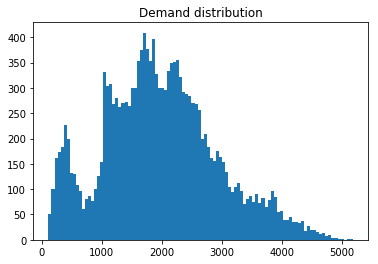

In [123]:
plt.hist(demand['demand'].dropna(), bins=100)
plt.title('Demand distribution')
plt.show()

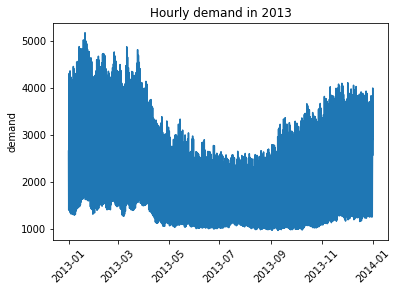

In [124]:
plt_df = demand.copy().loc[(demand['timeStamp']>='2013-01-01') & (demand['timeStamp']<'2014-01-01'), ]
plt.plot(plt_df['timeStamp'], plt_df['demand'], markersize=1)
plt.title('Hourly demand in 2013')
plt.ylabel('demand')
plt.xticks(rotation=45)
plt.show()

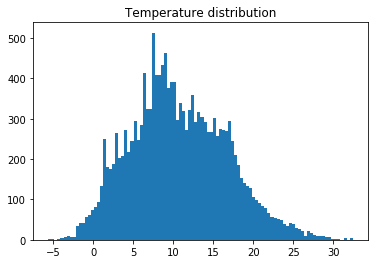

In [125]:
plt.hist(demand['temp'].dropna(), bins=100)
plt.title('Temperature distribution')
plt.show()

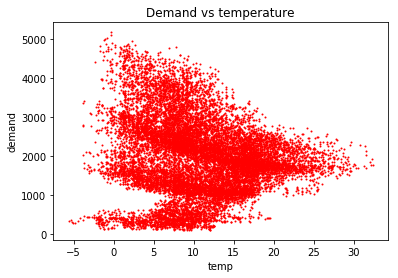

In [126]:
plt.plot(demand['temp'], demand['demand'], 'ro', markersize=1)
plt.title('Demand vs temperature')
plt.xlabel('temp')
plt.ylabel('demand')
plt.show()

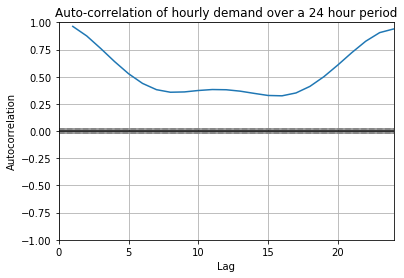

In [127]:
autocorrelation_plot(demand['demand'].dropna())
plt.xlim(0,24)
plt.title('Auto-correlation of hourly demand over a 24 hour period')
plt.show()

In [128]:
def generate_lagged_features(df, var, max_lag):
    for t in range(1, max_lag+1):
        df[var+'_lag'+str(t)] = df[var].shift(t, freq='1H')

In [129]:
generate_lagged_features(demand, 'temp', 6)
generate_lagged_features(demand, 'windSpeed', 6)
generate_lagged_features(demand, 'humidity', 6)
generate_lagged_features(demand, 'demand', 6)

In [130]:
###############################################
############### Normalize Data ################
###############################################
demand.dropna(how='any', inplace=True)
from sklearn import preprocessing
dsfdsfsf = demand.columns
tempdemand = demand.drop(columns='timeStamp')
xdemand = tempdemand.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xdemand)
tempdemand = pd.DataFrame(x_scaled)

tempdemand.index = demand.timeStamp
tempdemand = tempdemand.reindex(dt_idx)
tempdemand.reset_index(inplace=True)
tempdemand.columns = dsfdsfsf
#tempdemand.head()
tempdemand = tempdemand.interpolate(limit=6, method='linear')
#tempdemand.isnull().sum()
tempdemand.dropna(how='any', inplace=True)
#tempdemand.head()

In [131]:
demand = tempdemand

In [132]:
demand = demand.loc[demand['timeStamp']>'2013-01-01'] #used to drop all 2012 data as they are very sparse
train, test = (demand.loc[demand['timeStamp']<'2014-01-01'], demand.loc[demand['timeStamp']>='2014-01-01'])
train.to_csv('nyc_demand_train.csv', float_format='%.4f', index=False)
test.to_csv('nyc_demand_test.csv', float_format='%.4f', index=False)